An imaginary company in the 36th century called ABC Technologies provides telecom and communication product and services in the B2B space. The company wants to build a more personalized pricing policies for its customer and for this they have contacted you to build a pricing model.
Model Goal - "Build a model to predict prices for customers"
Target variable- contract_value

Key considerations - 
1. Contract value cannot be zero or lesser
2. The latest contracts defines the current market trend 
3. Team does not trust ML models so you need to explain the model decisions
4.  Team believes in reading code so you need to provide well commented code
5. There are data quality issues, you are expected to process and clean the data. You are free to assume the data quality definition, but you are expected to provide the details of assumptions made. 
6. You are free to take decisions on feature engineering and feature selection. “usage of internet” & “store city” columns are mandatory to be used for modelling.

Key deliverables 
1. Modular code for all the pipelines (can be jupyter notebook or .py files)
2. Data Analysis jupyter notebook

Evaluation Criteria
    1. Clean and readable code
    2. R2 score and RMSE
    3. Model choices and explanation

In [2]:
%run mlhelpers.py

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('../data/assignment_data.csv')
print(df.shape)
df.head()

(234788, 17)


,contract_segment,contract_value,contract_date,customer_type,client $$65 line 6ofbusiness,contract validity ststa,contract validity fins h,unneccesary_flag,contract_base,Level1,Level 3 #6375,Level2,internet_line,store city,code,usage of internet,customer Id
0,Level1,78.216902,4/15/3604,Near Term,Type2,7/1/3604,10/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
1,Level1,78.216902,4/15/3604,Near Term,Type2,7/1/3604,10/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
2,Level1,78.216902,4/15/3604,Near Term,Type2,7/1/3604,10/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
3,Level1,42.695289,4/15/3604,Near Term,Type2,7/1/3604,10/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
4,Level1,90.765416,4/15/3604,Near Term,Type2,7/1/3604,10/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617


In [5]:
df.rename(columns = {'client $$65 line 6ofbusiness ':'client_line_of_business','Level 3 #6375':'Level_3'},inplace=True)

In [6]:
df.columns

Index(['contract_segment', 'contract_value', 'contract_date', 'customer_type',
       'client_line_of_business', 'contract validity ststa',
       'contract validity fins h', 'unneccesary_flag', 'contract_base',
       'Level1', 'Level_3', 'Level2  ', 'internet_line', 'store city', 'code',
       'usage of internet', 'customer Id'],
      dtype='object')

## Removing outliers / invalid values

**Contract value cannot be zero or lesser**

In [7]:
print(df[df.contract_value<=0].shape)
df = df[df.contract_value>0]

(7017, 17)


In [8]:
df = df.drop_duplicates()

why have more than 1 entry except contract value?

In [9]:
df = df.drop_duplicates(subset=['contract_segment', 'contract_date', 'customer_type',
       'client_line_of_business', 'contract validity ststa',
       'contract validity fins h', 'unneccesary_flag', 'contract_base',
       'Level1', 'Level_3', 'Level2  ', 'internet_line', 'store city',
       'code', 'usage of internet', 'customer Id'])

In [10]:
print(df['customer Id'].nunique())
df.shape

1729


(72867, 17)

In [11]:
df.head()

,contract_segment,contract_value,contract_date,customer_type,client_line_of_business,contract validity ststa,contract validity fins h,unneccesary_flag,contract_base,Level1,Level_3,Level2,internet_line,store city,code,usage of internet,customer Id
0,Level1,78.216902,4/15/3604,Near Term,Type2,7/1/3604,10/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
5,Level2,58.628879,11/7/3604,Near Term,Type2,1/1/3605,2/28/3605,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
7,Level4,75.540066,11/25/3604,Near Term,Type2,11/25/3604,11/30/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
8,Level4,75.384003,11/26/3604,Near Term,Type2,12/1/3604,12/31/3604,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617
9,Level1,59.372384,12/3/3604,Near Term,Type2,3/1/3605,3/31/3605,NO,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617


## Handling data types

In [12]:
df.dtypes

contract_segment             object
contract_value              float64
contract_date                object
customer_type                object
client_line_of_business      object
contract validity ststa      object
contract validity fins h     object
unneccesary_flag             object
contract_base                object
Level1                       object
Level_3                      object
Level2                       object
internet_line                object
store city                   object
code                         object
usage of internet            object
customer Id                   int64
dtype: object

In [13]:
df['validity_st'] = pd.to_datetime(df['contract validity ststa'].astype(str).apply(lambda x: str(int(x.split('/')[2])-1600)\
                                                               +'-'+x.split('/')[0]+'-'+x.split('/')[1]))
df['validity_end'] = pd.to_datetime(df['contract validity fins h'].astype(str).apply(lambda x: str(int(x.split('/')[2])-1600)\
                                                               +'-'+x.split('/')[0]+'-'+x.split('/')[1]))

In [14]:
df['contract_length'] = (df['validity_end'] - df['validity_st']).apply(lambda x: x.days/365)

In [15]:
df['contract_date'] = pd.to_datetime(df['contract_date'].astype(str).apply(lambda x: str(int(x.split('/')[2])-1600)\
                                        +'-'+x.split('/')[0]+'-'+x.split('/')[1]))

df['contract_age'] = df.contract_date.apply(lambda x: (datetime.now()-x).days/365)

In [16]:
df_train = df.drop(columns = ['contract validity ststa','contract validity fins h'])

In [17]:
df_train.unneccesary_flag = df_train.unneccesary_flag.apply(lambda x: convert_boolean(x))

## Pandas Profiling Report

In [18]:
# # # Pandas_Profiling_Report
# profile = ProfileReport(df_train)
# profile.to_file("Pandas_Profiling_Report_ML_dataset.html")

In [19]:
df_train.head()

,contract_segment,contract_value,contract_date,customer_type,client_line_of_business,unneccesary_flag,contract_base,Level1,Level_3,Level2,internet_line,store city,code,usage of internet,customer Id,validity_st,validity_end,contract_length,contract_age
0,Level1,78.216902,2004-04-15,Near Term,Type2,0,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617,2004-07-01,2004-10-31,0.334247,18.424658
5,Level2,58.628879,2004-11-07,Near Term,Type2,0,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617,2005-01-01,2005-02-28,0.158904,17.860274
7,Level4,75.540066,2004-11-25,Near Term,Type2,0,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617,2004-11-25,2004-11-30,0.013699,17.810959
8,Level4,75.384003,2004-11-26,Near Term,Type2,0,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617,2004-12-01,2004-12-31,0.082192,17.808219
9,Level1,59.372384,2004-12-03,Near Term,Type2,0,Type1,Base Service,Internet Service office,Service 1,Internet,MADURAI,NaN,Calling,551617,2005-03-01,2005-03-31,0.082192,17.789041


In [20]:
df_train.to_csv('./data/df_train.csv')

## Outlier Detection

## Distribution checker / scatter plots

In [24]:
target_col = 'contract_value'
feature_cols = list(set(df.columns)-set(['orig_index',target_col, 'validity_end','validity_st','contract_date', 'customer Id' ]))


<AxesSubplot:xlabel='contract_length', ylabel='contract_value'>

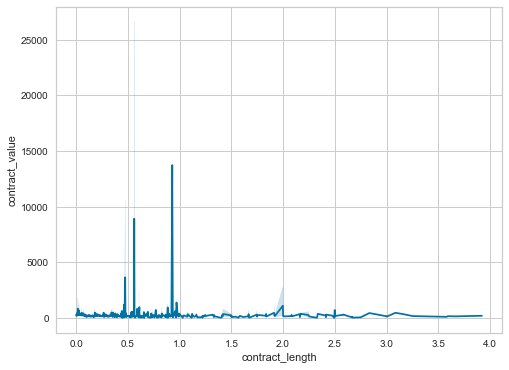

In [22]:
value_col='contract_length'
target_col='contract_value'

fig,ax = plt.subplots(figsize = [8,6])
sns.lineplot(x=df[value_col],y=df[target_col], ax=ax)

<AxesSubplot:xlabel='usage of internet', ylabel='contract_value'>

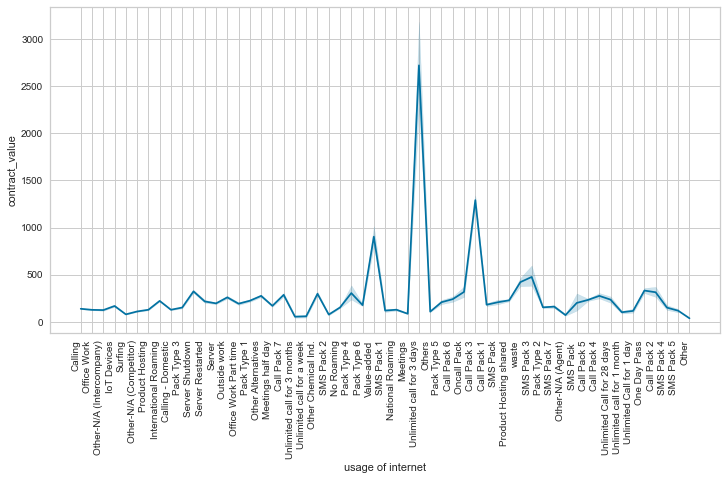

In [37]:
# for c in ['contract_length','contract_age', 'usage of internet', 'customer_type', 'Level2  ', 'store city',]:
fig,ax = plt.subplots(figsize = [12,6])
plt.xticks(rotation=90, ha='right')
sns.lineplot(x=df['usage of internet'],y=df[target_col],ax=ax)

<AxesSubplot:xlabel='Level2  ', ylabel='contract_value'>

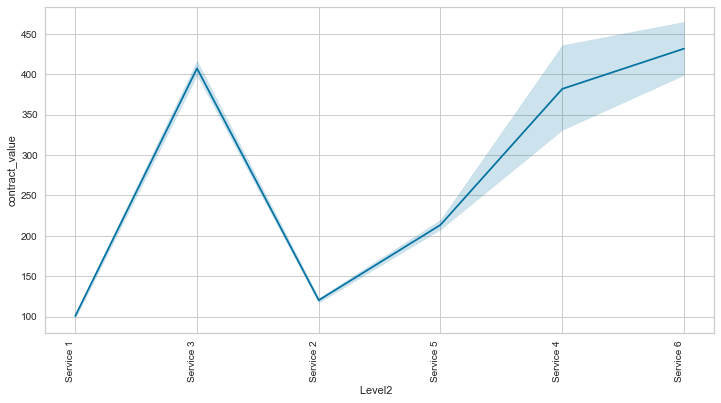

In [38]:
fig,ax = plt.subplots(figsize = [12,6])
plt.xticks(rotation=90, ha='right')
sns.lineplot(x=df['Level2  '],y=df[target_col],ax=ax)

## Reference/Deprecated

In [25]:
# plt.figure(figsize=(12,8))
# ax.set_xticklabels(groupeddf[value_col], rotation = 90)